In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate as inte
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from numpy import matmul as mm

In [2]:
def sind(theta):
    return np.sin(theta/180*np.pi)
def cosd(theta):
    return np.cos(theta/180*np.pi)

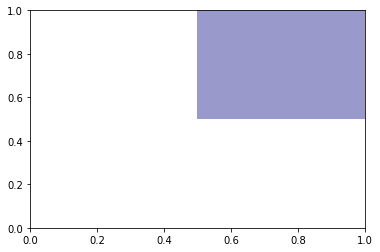

In [64]:
fig, ax = plt.subplots()
patches = []
num_polygons = 1
num_sides = 4

for i in range(num_polygons):
    tmp = np.array([[.5,.5],[.5,1],[1,1],[1,.5]])
    polygon = Polygon(tmp, True)
    patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))

ax.add_collection(p)

In [12]:
print(patches[0])

Polygon6((0.0221904, 0.89367) ...)


In [4]:
def appendFV(fv1,fv2):
    n1 = fv1['vertices'].shape[0]
    fv3 = {}
    fv3['vertices'] = np.vstack((fv1['vertices'],fv2['vertices']))
    fv3['faces'] = np.vstack((fv1['faces'],fv2['faces']+n1))
    return fv3
def transformFV(fv,theta,t):
    out = {}
    out['faces'] = fv['faces']
    c = cosd(theta)
    s = sind(theta)
    out['vertices'] = mm(fv['vertices'],np.array([[c,s],[-s,c]]))+t.reshape(1,-1)
    return out
def TwoLinkRobot(cspace_coordinates):
    w,l,w2,l2 = .5,5,.75,1
    link1,endeffector = {},{}
    link1['vertices']=np.array([[0,-w],[l,-w],[l,w],[0,w]])
    link1['faces']=np.array([[1,2,3],[1,3,4]])
    endeffector['vertices'] = np.array([[0,-w2],[l2,-w2],
                                       [0,w2],[l2,w2]])
    endeffector['faces'] = np.array([[1,2,3],[1,3,4]])
    link2 = appendFV(link1,transformFV(endeffector,0,np.array([l,0])))
    link2 = transformFV(link2,cspace_coordinates[0],np.array([l,0]))
    fv = appendFV(link1,link2)
    fv = transformFV(fv,cspace_coordinates[1],np.array([0,0]))
    return fv

In [21]:
fv = TwoLinkRobot(np.array([330,90]))
sz = 12
print(fv['faces'])
print(fv['vertices'])

[[ 1  2  3]
 [ 1  3  4]
 [ 5  6  7]
 [ 5  7  8]
 [ 9 10 11]
 [ 9 11 12]]
[[ 5.00000000e-01 -3.06161700e-17]
 [ 5.00000000e-01  5.00000000e+00]
 [-5.00000000e-01  5.00000000e+00]
 [-5.00000000e-01  3.06161700e-17]
 [ 4.33012702e-01  4.75000000e+00]
 [ 2.93301270e+00  9.08012702e+00]
 [ 2.06698730e+00  9.58012702e+00]
 [-4.33012702e-01  5.25000000e+00]
 [ 3.14951905e+00  8.95512702e+00]
 [ 3.64951905e+00  9.82115242e+00]
 [ 1.85048095e+00  9.70512702e+00]
 [ 2.35048095e+00  1.05711524e+01]]


(-0.7074759526419166,
 3.8569950054802487,
 -0.5285576211353316,
 11.099710043841961)

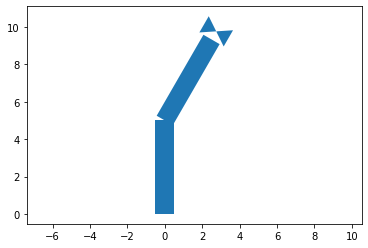

In [75]:
fig, ax = plt.subplots()
for i in range(3):
    pgon = plt.Polygon(fv['vertices'][4*i:4*(i+1)])
    ax.add_patch(pgon)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 15])
plt.axis('equal')

(0, 15)

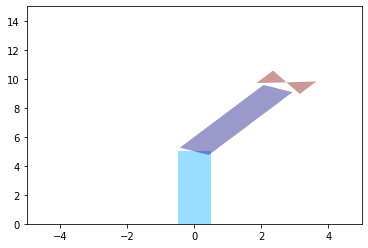

In [65]:
fig, ax = plt.subplots()
patches = []

for i in range(3):
    polygon = Polygon(fv['vertices'][4*i:4*(i+1)], True)
    patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))

ax.add_collection(p)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 15])

(0, 15)

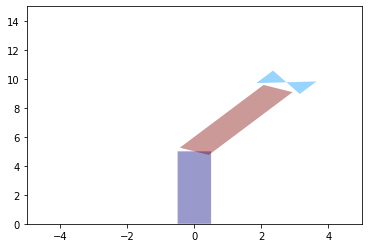

In [74]:
fig, ax = plt.subplots()
patches = []

tmp = fv['vertices'][fv['faces'].flatten()-1]
for i in range(3):
    polygon = Polygon(tmp[6*i:6*(i+1)],True)
#     polygon = Polygon(fv['vertices'][4*i:4*(i+1)], True)
    patches.append(polygon)

p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)

colors = 100*np.random.rand(len(patches))
p.set_array(np.array(colors))

ax.add_collection(p)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 15])

In [73]:
tmp = fv['vertices'][fv['faces'].flatten()-1]
print(tmp.shape)

(18, 2)
